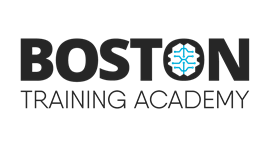

# This Notebook is designed for pre processing data in Sklearn.Tutorial will have following steps

1.Importing Python Modules 

2.Importing data 

3.Displaying data 

4.Replacing missing value with meaningful value 

5.Encoding catogerical data

6.Splitting the data into training and test set

7.Doing feature scaling on data 

#### About Sklearn 
- Simple and efficient tools for predictive data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

# Step1: Importing Python Modlues

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step2: Importing data 

Note: if your getting an error kindly debug it

In [8]:
data=pd.read_csv(r'Car_Purchasing_Data.csv',encoding='latin')

# Step3: Displaying the data

In [9]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


Step4: Displaying data information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  498 non-null    float64
 5   Annual Salary        484 non-null    float64
 6   Credit Card Debt     497 non-null    float64
 7   Net Worth            487 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


There are missing values in the data in the Age, Salary related columns

In [11]:
missing_data=['Age','Annual Salary','Credit Card Debt','Net Worth']

# Step5: Replacing missing values with the mean values of the columns

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean') 
imputer.fit(data[missing_data])
X=imputer.transform(data[missing_data])
X

array([[4.18517198e+01, 6.28120930e+04, 1.16093809e+04, 2.38961250e+05],
       [4.08706234e+01, 6.66468929e+04, 9.57295714e+03, 5.30973908e+05],
       [4.31528975e+01, 5.37985511e+04, 1.11603551e+04, 6.38467177e+05],
       ...,
       [5.39434972e+01, 6.88887780e+04, 1.06116069e+04, 7.64531320e+05],
       [5.91605086e+01, 4.98119906e+04, 1.40130345e+04, 3.37826638e+05],
       [4.67311525e+01, 6.13706777e+04, 9.39134163e+03, 4.62946492e+05]])

# Step6:Encoding the Catogerical data

In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X=LabelEncoder()
X= labelencoder_X.fit_transform(data['Country']) #Encoding the values of column Country
X

array([ 27,  17,   1,  41,  26, 100, 179,  45,   8, 171, 167,  66, 131,
       140, 195,  60, 185, 146,  34,  83, 176,   4, 133, 106, 105, 137,
        39, 126,  46,  48,  42,  24, 156,  56, 162,  28, 177, 189,  53,
        57, 189,  20,  62, 124, 127, 183,  47,   7, 180, 210, 191, 158,
       200, 121, 175,  73,  50, 169,  18,  31, 142,  97,  80,  80, 202,
       112,  63,  96, 115,  61, 140, 149,  90, 168,  93, 198, 147,  72,
        69,  36, 165, 167,  49,   5,  91,  89,  49, 104,  82, 177, 139,
        64,  29, 125, 162,  33,  21,  97,  50,  69, 126, 124,  20, 192,
       148, 201, 184, 128, 161, 159, 154, 200, 195, 170,   3,  54, 128,
        88,  85,  37, 105, 101, 116,  49,  18, 101, 100, 153,  97,  83,
       169, 109, 148,  72,   9,  99, 120,  54, 113,  68, 159,  93,  52,
       172, 205, 188, 138,  13, 105,  47,  21, 163, 183, 143,  11, 140,
       102,  44,  47, 208, 113, 115, 193,  92, 104,  89,  95,  72,  65,
        25, 182,  12,  98,  78,  58, 165, 210, 207,  76, 203, 16

In [14]:
onehotencoder=OneHotEncoder()
X=onehotencoder.fit_transform(data['Country'].ravel().reshape(-1,1))
X

<500x211 sparse matrix of type '<class 'numpy.float64'>'
	with 500 stored elements in Compressed Sparse Row format>

In [15]:
print(X)

  (0, 27)	1.0
  (1, 17)	1.0
  (2, 1)	1.0
  (3, 41)	1.0
  (4, 26)	1.0
  (5, 100)	1.0
  (6, 179)	1.0
  (7, 45)	1.0
  (8, 8)	1.0
  (9, 171)	1.0
  (10, 167)	1.0
  (11, 66)	1.0
  (12, 131)	1.0
  (13, 140)	1.0
  (14, 195)	1.0
  (15, 60)	1.0
  (16, 185)	1.0
  (17, 146)	1.0
  (18, 34)	1.0
  (19, 83)	1.0
  (20, 176)	1.0
  (21, 4)	1.0
  (22, 133)	1.0
  (23, 106)	1.0
  (24, 105)	1.0
  :	:
  (475, 136)	1.0
  (476, 152)	1.0
  (477, 189)	1.0
  (478, 190)	1.0
  (479, 87)	1.0
  (480, 153)	1.0
  (481, 106)	1.0
  (482, 201)	1.0
  (483, 85)	1.0
  (484, 56)	1.0
  (485, 207)	1.0
  (486, 82)	1.0
  (487, 108)	1.0
  (488, 114)	1.0
  (489, 61)	1.0
  (490, 125)	1.0
  (491, 50)	1.0
  (492, 98)	1.0
  (493, 205)	1.0
  (494, 160)	1.0
  (495, 128)	1.0
  (496, 208)	1.0
  (497, 144)	1.0
  (498, 24)	1.0
  (499, 209)	1.0


In [19]:
data['Gender'].replace({0:'Male',1:'Female'},inplace = True)

In [20]:
le=LabelEncoder()
y = le.fit_transform(data['Gender'])
y

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [22]:
le.inverse_transform(y) # Inverse the transform the data

array(['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
  

In [26]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(data['Gender'].ravel().reshape(-1,1))
X

<500x2 sparse matrix of type '<class 'numpy.float64'>'
	with 500 stored elements in Compressed Sparse Row format>

In [23]:
data['Gender'].ravel()

array(['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
  

In [17]:
X=data[['Age','Annual Salary','Credit Card Debt','Net Worth']]
y=data['Car Purchase Amount']

# Step7: Splitting the data into training and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)

# Step8: Doing a feature scaling on data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)